In [365]:
#setup

import numpy as np
import keras
import matplotlib.pyplot as plt
import csv
import datetime
from collections import defaultdict

In [366]:
#parse data from customers.csv
# Each array will be named according to its source datafile, as these groups of arrays will be indexed to link the lines of data

customers_CustomerID = []
customers_Identifier = []
customers_CreatedOn = []

with open('data/customers.csv','r') as csvfile:
    customerfile = csv.reader(csvfile, delimiter = ',')
    #skip the first line
    next(customerfile)
    for row in customerfile:
        #ints are fine, python converts to long where needed
        customers_CustomerID.append(int(row[0]))
        customers_Identifier.append(int(row[1]))
        #moves date/time string into datetime struct
        customers_CreatedOn.append(datetime.datetime.strptime(row[2], '%Y-%m-%d %H:%M:%S.%f'))
        

In [367]:
#parse data from products.csv

products_ProductID = []
products_ProductVariantID = []
products_ExternalID = []

with open('data/products.csv','r') as csvfile:
    productfile = csv.reader(csvfile, delimiter = ',')
    #skip the first line
    next(productfile)
    for row in productfile:
        products_ProductID.append(int(row[0]))
        products_ProductVariantID.append(int(row[1]))
        products_ExternalID.append(int(row[2]))

In [368]:
#parse data from sales_orders.csv

sales_orders_ExternalCustomerID = []
sales_orders_TransactionDate = []
sales_orders_SalesOrderHeaderID = []
sales_orders_SalesOrderLineID = []
sales_orders_Quantity = []
sales_orders_NetAmount = []
sales_orders_ExternalProductID = []

with open('data/sales_orders.csv','r') as csvfile:
    salesfile = csv.reader(csvfile, delimiter = ',')
    #skip the first line
    next(salesfile)
    for row in salesfile:
        #expecting conversion errors for missing entries
        if row[0] == '':
            sales_orders_ExternalCustomerID.append(0)
        else:
            sales_orders_ExternalCustomerID.append(int(row[0]))
        #also a datetime struct
        sales_orders_TransactionDate.append(datetime.datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S.%f'))
        sales_orders_SalesOrderHeaderID.append(int(row[2]))
        sales_orders_SalesOrderLineID.append(int(row[3]))
        sales_orders_Quantity.append(int(row[4]))
        sales_orders_NetAmount.append(float(row[5]))
        sales_orders_ExternalProductID.append(int(row[6]))

In [369]:
#Identify all customers who have only made one sales order.

# Relevant Arrays:
#    sales_orders_ExternalCustomerID
#    sales_orders_SalesOrderHeaderID
#    customers_Identifier
#    customers_CustomerID

In [370]:
# Number of unique customers
uniqueExternalIDs = list(dict.fromkeys(sales_orders_ExternalCustomerID))

print('Number of unique customers: ', len(uniqueExternalIDs))

Number of unique customers:  6498


In [371]:
# Customers who only made a single order
singleorderexternals = []
externalIDnumpy = np.array(sales_orders_ExternalCustomerID)

for customer in uniqueExternalIDs:
    # finds all indexes where the given customer makes an order
    orderindexes = np.where(externalIDnumpy == customer)[0]
    # creates temporary list of headers from these indexes
    x = []
    for i in orderindexes:
        x.append(sales_orders_SalesOrderHeaderID[i])
    #checks to see if all headers are the same, indicating only a single order. Assumes every externalID has a header
    onlyone = all(header == x[0] for header in x)
    if onlyone:
        singleorderexternals.append(customer)
    
print('Number of people who only ordered once: ', len(singleorderexternals))    

Number of people who only ordered once:  4638


In [372]:
# Registerd CustomerIDs who only made a single order
singleorderinternals = []
for customer in singleorderexternals:
    try:
        internalCustomerID = customers_CustomerID[customers_Identifier.index(customer)]
        singleorderinternals.append(internalCustomerID)
    except ValueError:
        continue
        
print('Number of registered CustomerIDs who only ordered once: ', len(singleorderinternals))

Number of registered CustomerIDs who only ordered once:  4566


In [373]:
#very long list of all CustomerIDs who only ordered once
print(singleorderinternals)

[3695756, 3687756, 3695770, 3695771, 3691987, 3687763, 3687797, 3696166, 3695739, 3695555, 3695777, 3695759, 3687768, 3695754, 3695736, 3695737, 3696343, 3687848, 3695769, 3695760, 3695755, 3687889, 3695776, 3687828, 3695767, 3687823, 3695742, 3695765, 4354141, 3687859, 3695763, 3695764, 3695753, 3695745, 3687853, 3687784, 3690497, 3692900, 3695762, 3695740, 3695749, 3695085, 3695752, 3687882, 3687821, 3695747, 3695748, 3695758, 3695751, 3695738, 3695750, 3695768, 3687921, 3689248, 3695741, 3687904, 3695775, 3695757, 3687881, 3695779, 3695780, 3695792, 9806509, 3695785, 3695931, 3695950, 3696031, 3687940, 3695873, 3695874, 3695906, 3695926, 3695997, 3696001, 3687918, 3687914, 3696152, 3696164, 3696117, 3696137, 3696140, 3696146, 3696162, 3696170, 3696058, 3696094, 3696129, 3696079, 3696424, 3696174, 3696178, 3696190, 3696220, 3696183, 3702876, 3696350, 3696507, 3696222, 3696279, 3696364, 3696444, 4354176, 4354166, 9806483, 3696395, 3696360, 3696479, 3696626, 9806461, 3696475, 3696358, 

In [374]:
#Identify all customers who have spent more than $100

# Relevant Arrays:
#    sales_orders_ExternalCustomerID
#    sales_orders_NetAmount
#    customers_Identifier
#    customers_CustomerID

In [375]:
# Number of unique customers by spending
# The defaultdict class will initialize new keys to 0
externaltotalspent = defaultdict(float)

# Iterating through all ExternalID/NetAmount pairs which are already index matched
# Rounding total spending data to the penny
for ExternalID, NetAmount in zip(sales_orders_ExternalCustomerID, sales_orders_NetAmount):
    externaltotalspent[ExternalID] = round(externaltotalspent[ExternalID] + NetAmount, 2)
    
print('Number of unique customers:', len(externaltotalspent))

Number of unique customers: 6498


In [376]:
# Number of spenders over $100 

externalover100 = {}
for ExternalID, totalspent in externaltotalspent.items():
    if totalspent > 100:
        externalover100.update({ExternalID: totalspent})
               
print('Number of customers who spent over $100:', len(externalover100))

Number of customers who spent over $100: 4785


In [377]:
# CustomerIDs

internaltotalspent = {}
for ExternalID, totalspent in externaltotalspent.items():
    # externaltotalspent.key and customers_CustomerID should both be unique
    try:
        customerindex = customers_Identifier.index(ExternalID)
    except ValueError:
        continue
    # create a key/value pair using the internal customerID tied to the index of the externalID, and the previously found value
    internaltotalspent.update({customers_CustomerID[customerindex]: totalspent})
    
print('Number of unique customers who are registered with internal IDs:', len(internaltotalspent))

Number of unique customers who are registered with internal IDs: 6414


In [378]:
# CustomerIDs over $100

internalover100 = {}
for CustomerID, totalspent in internaltotalspent.items():
    if totalspent > 100:
        internalover100.update({CustomerID: totalspent})
    
print('Number of customers who spent over $100 and are registered with internal IDs:', len(internalover100))

Number of customers who spent over $100 and are registered with internal IDs: 4724


Bottom 10 registered spenders:
Customer  9780819  spent: $ 0.0
Customer  9869366  spent: $ 13.19
Customer  9662373  spent: $ 14.85
Customer  9709253  spent: $ 14.85
Customer  5577458  spent: $ 16.5
Customer  9907138  spent: $ 16.5
Customer  9907141  spent: $ 16.5
Customer  9977475  spent: $ 18.15
Customer  3696201  spent: $ 19.8
Customer  8879175  spent: $ 19.8
Top 10 registered spenders:
Customer  3695816  spent: $ 3686.07
Customer  3696629  spent: $ 3777.39
Customer  3686351  spent: $ 4141.5
Customer  9956124  spent: $ 4773.17
Customer  6447437  spent: $ 5456.0
Customer  9780877  spent: $ 7001.5
Customer  5574599  spent: $ 7014.59
Customer  3702784  spent: $ 7581.63
Customer  3696610  spent: $ 12614.6
Customer  8897719  spent: $ 24065.23


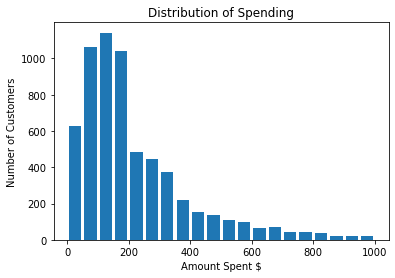

In [379]:
#Data sort of spenders

# Sort the final sums
sortedinternals = sorted(internaltotalspent.items(), key = lambda kv:(kv[1], kv[0]))
print('Bottom 10 registered spenders:')
for customer, amount in sortedinternals[0:10]:
    print('Customer ', customer, ' spent: $', amount)
print('Top 10 registered spenders:')
for customer, amount in sortedinternals[-10:]:
    print('Customer ', customer, ' spent: $', amount)

# plot the internal spenders up to $1000
internals, totals = zip(*sortedinternals)
bins = [0,50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
    
plt.hist(totals, bins, histtype='bar', rwidth=0.8)
plt.title('Distribution of Spending')
plt.xlabel('Amount Spent $')
plt.ylabel('Number of Customers')
plt.show()

In [380]:
#very long list of all CustomerIDs who spent over $100
print(internalover100.keys())

dict_keys([4354139, 3696645, 3695773, 3695923, 3695989, 3696048, 3693758, 3691987, 3687763, 3695744, 3695739, 4354143, 3693784, 3696607, 3696627, 3695615, 3696343, 3687830, 3695769, 3696473, 3695755, 3687889, 3696567, 9806530, 3687828, 3695767, 3687823, 3695742, 3693527, 3694964, 3687859, 3695753, 3695774, 3692900, 3695796, 3695749, 3695085, 3696416, 3687882, 3687821, 3695746, 3696341, 3695748, 3696491, 3695751, 3695750, 3695768, 3702862, 3695725, 3687921, 3689248, 3692576, 3695741, 3695761, 3687904, 3695775, 3687881, 3687924, 3687910, 3696574, 3687959, 3695779, 3695780, 4352981, 3696195, 9806509, 3687930, 3695820, 3695835, 3696622, 3695890, 3695931, 3695790, 3687940, 3695873, 3695874, 3695906, 3695926, 3695929, 4354216, 3695997, 3696001, 3695781, 3696344, 3695917, 3695934, 3695960, 3695787, 3695893, 3696042, 3696012, 3696557, 3695856, 3687918, 3695313, 3687914, 3687922, 3696447, 3696347, 3696164, 3696105, 3696146, 3696162, 3696265, 3696170, 3696091, 3696122, 3696058, 3696550, 3696094,

In [381]:
#Identify all customers who have bought multiple different products in a single sales order.

# Relevant Arrays:
#    sales_orders_ExternalCustomerID
#    sales_orders_SalesOrderHeaderID
#    sales_orders_SalesOrderLineID
#    customers_Identifier
#    customers_CustomerID

#Assuming that common sales order header IDs indicate multiple unique product purchases

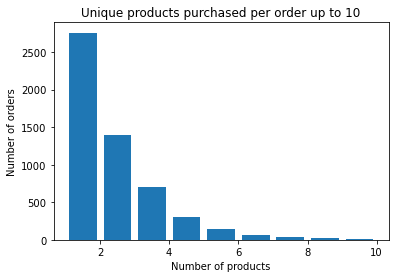

Number of sales orders including more than 10 different products:  14


In [382]:
# Create a list of indices where duplicate headers occur, indicating multiple products within an order
unique_set = set()
duplicateindices = []
numproducts = {}

for i, header in enumerate(sales_orders_SalesOrderHeaderID): 
    if header not in unique_set: 
        unique_set.add(header)
        numproducts.update({header: 0})
    else: 
        duplicateindices.append(i)  
        numproducts[header] += 1
    
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
plt.hist(numproducts.values(), bins, histtype='bar', rwidth=0.8)
plt.title('Unique products purchased per order up to 10')
plt.xlabel('Number of products')
plt.ylabel('Number of orders')
plt.show()

orders_over_10_products = 0
for num in numproducts.values():
    if num > 10:
        orders_over_10_products += 1
        
print('Number of sales orders including more than 10 different products: ', orders_over_10_products)

In [383]:
# use sales_order mapped indices to create a list of internal CustomerIDs
multipleproductinternals_set = set()
for i in duplicateindices:
    try:
        #get the CustomerID of the associated Identifier that is the same as the ExternalID at the given index
        internalCustomerID = customers_CustomerID[customers_Identifier.index(sales_orders_ExternalCustomerID[i])]
        if internalCustomerID not in multipleproductinternals_set:
            multipleproductinternals_set.add(internalCustomerID)
    except ValueError:
        continue

print('Number of orders containing multiple products: ', len(multipleproductinternals_set))
# percentage stat rounded to the nearest 100th
print('Percentage of customers who order more than one product at once: ', 
      round(100*len(multipleproductinternals_set)/len(customers_CustomerID), 2), '%')

Number of orders containing multiple products:  3768
Percentage of customers who order more than one product at once:  14.07 %


In [384]:
#very long list of all CustomerIDs who bought more than one product in a single order
print(multipleproductinternals_set)

{3702784, 3702787, 3694597, 3702793, 9781257, 3694603, 9781258, 9871376, 9781264, 9871383, 9871385, 9781275, 6570013, 6570015, 9871391, 6570018, 3686435, 3694627, 9871400, 9871408, 3686449, 3694645, 3694646, 3694656, 9781316, 3694662, 9781319, 9781320, 3694669, 3694671, 3702871, 6570072, 3702883, 3694695, 6258793, 6258794, 5652586, 3702892, 6258798, 3702895, 3702896, 6258799, 3694706, 8847475, 6258803, 8847480, 9928824, 3702906, 3702907, 8847482, 9928825, 9928826, 9928831, 6258819, 8847492, 8847493, 3694726, 9928837, 9805962, 6258827, 3694732, 8847500, 5619853, 5619855, 5619858, 5619859, 8847508, 3694739, 3694741, 3694745, 9805978, 3694749, 5636254, 9805982, 5636256, 3694752, 5603491, 3686564, 5619877, 3694765, 3694767, 5603505, 5603506, 3694772, 5619895, 5636280, 3694775, 5619898, 9797820, 5603517, 5619901, 3694781, 3694787, 3686598, 3694791, 3694798, 3694800, 6562006, 5619929, 9797851, 3694811, 9797854, 5619937, 9797859, 5619939, 6562020, 3694823, 3694825, 3694826, 9806061, 9797872, 

In [385]:
#Identify the most popular product that customers buy defined by quantity.

# Relevant Arrays:
#    products_ProductID
#    products_ExternalID
#    sales_orders_Quantity
#    sales_orders_ExternalProductID

# Assuming that product variants are not considered unique products
# Because ExternalProductIDs can be directly mapped to ProductIDs, variant information is unnecessary

In [386]:
# narrow the product list to exclude variants
uniqueproducts = dict.fromkeys(products_ProductID, 0)
print('Number of unique products: ',  len(uniqueproducts))

# create a list of unique ExternalProductIDs to map purchases to
uniqueexternalproductIDs = dict.fromkeys(sales_orders_ExternalProductID, 0)
print('Number of unique product variants purchased: ',  len(uniqueexternalproductIDs))

# percentage stat rounded to the nearest 100th
print('Percentage of product variants that have ever been ordered: ', 
      round(100*len(uniqueexternalproductIDs)/len(products_ProductID), 2), '%')

Number of unique products:  110
Number of unique product variants purchased:  836
Percentage of product variants that have ever been ordered:  69.61 %


In [387]:
#determine the number of each ExternalID purchases
for i, num in enumerate(sales_orders_Quantity):
    uniqueexternalproductIDs[sales_orders_ExternalProductID[i]] += num
    

Bottom 10 products, excluding the first 31 unpurchased:
Product  401123  was purchased  1 times.
Product  443837  was purchased  12 times.
Product  401176  was purchased  17 times.
Product  442776  was purchased  17 times.
Product  442883  was purchased  19 times.
Product  433613  was purchased  26 times.
Product  401185  was purchased  28 times.
Product  442192  was purchased  28 times.
Product  401187  was purchased  32 times.
Product  401142  was purchased  39 times.
Top 10 products:
Product  401147  was purchased  690 times.
Product  401178  was purchased  708 times.
Product  401144  was purchased  765 times.
Product  401159  was purchased  822 times.
Product  401188  was purchased  906 times.
Product  401163  was purchased  998 times.
Product  401189  was purchased  1067 times.
Product  401169  was purchased  1506 times.
Product  401191  was purchased  2078 times.
Product  401162  was purchased  2480 times.

Number of false purchases, or purchases for externalIDs without internalI

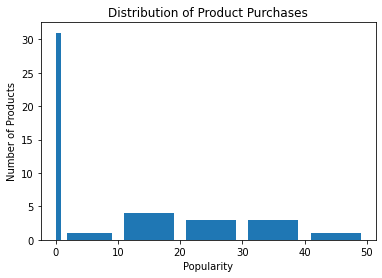

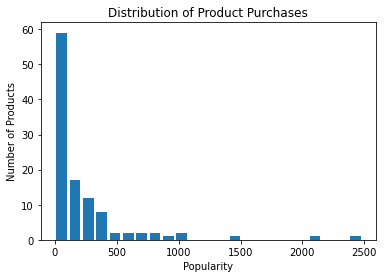

In [388]:
#translate ExternalProductIDs into ProductIDs
unknownproducts = 0
for external, count in uniqueexternalproductIDs.items():
    #find the internal ID matching the external pair
    try:
        internalproduct = products_ProductID[products_ExternalID.index(external)]
        #add the value to the running total for the product
        uniqueproducts[internalproduct] += count
    except ValueError:
        unknownproducts += 1
        continue
        
sortedproducts_bypopularity = sorted(uniqueproducts.items(), key = lambda kv:(kv[1], kv[0]))
print('Bottom 10 products, excluding the first 31 unpurchased:')
for product, amount in sortedproducts_bypopularity[31:41]:
    print('Product ', product, ' was purchased ', amount, 'times.')
print('Top 10 products:')
for product, amount in sortedproducts_bypopularity[-10:]:
    print('Product ', product, ' was purchased ', amount, 'times.')
    
print('\nNumber of false purchases, or purchases for externalIDs without internalIDs: ', unknownproducts)

bins = [0, 1, 10, 20, 30, 40, 50]

plt.hist(uniqueproducts.values(), bins, histtype='bar', rwidth=0.8)
plt.title('Distribution of Product Purchases')
plt.xlabel('Popularity')
plt.ylabel('Number of Products')
plt.show()
        
plt.hist(uniqueproducts.values(), 'auto', histtype='bar', rwidth=0.8)
plt.title('Distribution of Product Purchases')
plt.xlabel('Popularity')
plt.ylabel('Number of Products')
plt.show()

In [389]:
#very short list of the 1 most popular product by quantity
print(sortedproducts_bypopularity[-1:])

[(401162, 2480)]


In [390]:
#Identify the most profitable product defined by total sales order revenue
# Relevant Arrays:
#    products_ProductID
#    products_ExternalID
#    sales_orders_NetAmount
#    sales_orders_ExternalProductID

# Essentially the same process as quantity

In [391]:
# narrow the product list to exclude variants
uniqueproducts_profit = dict.fromkeys(products_ProductID, 0)
print('Number of unique products: ',  len(uniqueproducts_profit))

# create a list of unique ExternalProductIDs to map purchases to
uniqueexternalproductIDs_profit = dict.fromkeys(sales_orders_ExternalProductID, 0)
print('Number of unique product variants purchased: ',  len(uniqueexternalproductIDs_profit))

Number of unique products:  110
Number of unique product variants purchased:  836


In [392]:
#determine the value of each ExternalID purchase
for i, val in enumerate(sales_orders_NetAmount):
    uniqueexternalproductIDs_profit[sales_orders_ExternalProductID[i]] += val

Bottom 10 products, excluding the first 31 unpurchased:
Product  401123  netted $ 110.0
Product  443837  netted $ 263.88
Product  442776  netted $ 373.83
Product  401176  netted $ 673.2
Product  442192  netted $ 769.86
Product  401168  netted $ 1156.32
Product  442193  netted $ 1198.56
Product  401185  netted $ 1232.0
Product  403547  netted $ 1374.79
Product  401149  netted $ 2865.35
Top 10 products:
Product  401180  netted $ 38207.58
Product  433612  netted $ 40115.55
Product  401182  netted $ 49216.26
Product  401160  netted $ 51803.73
Product  442885  netted $ 54537.19
Product  401159  netted $ 66770.0
Product  401162  netted $ 96426.66
Product  401191  netted $ 134245.84
Product  401188  netted $ 138865.39
Product  401163  netted $ 151005.97

Number of false purchases, or purchases for externalIDs without internalIDs:  3


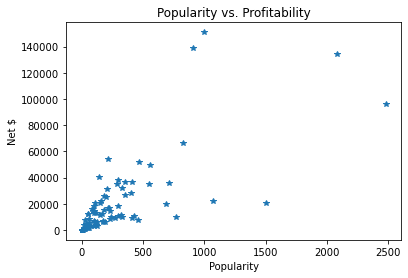

In [393]:
#translate ExternalProductIDs into ProductIDs
unknownproducts = 0
for external, value in uniqueexternalproductIDs_profit.items():
    #find the internal ID matching the external pair
    try:
        internalproduct = products_ProductID[products_ExternalID.index(external)]
        #add the value to the running total for the product, rounding to the nearest penny
        uniqueproducts_profit[internalproduct] = round(uniqueproducts_profit[internalproduct] + value, 2)
    except ValueError:
        unknownproducts += 1
        continue
        
sortedproducts_byprofit = sorted(uniqueproducts_profit.items(), key = lambda kv:(kv[1], kv[0]))
print('Bottom 10 products, excluding the first 31 unpurchased:')
for product, amount in sortedproducts_byprofit[31:41]:
    print('Product ', product, ' netted $', amount)
print('Top 10 products:')
for product, amount in sortedproducts_byprofit[-10:]:
    print('Product ', product, ' netted $', amount)
    
print('\nNumber of false purchases, or purchases for externalIDs without internalIDs: ', unknownproducts)

xp = list(uniqueproducts.values())
yp = list(uniqueproducts_profit.values())
        
plt.plot(xp,yp, "*")
plt.title('Popularity vs. Profitability')
plt.xlabel('Popularity')
plt.ylabel('Net $')
plt.show()

In [394]:
#proability that given a customer's purchase time habits, or location based on likely purchase times,
# they will purchase a specific product